In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def generate_data(size):
    d = 2
    w = np.random.randint(1,10,d)
    b = np.random.randint(1,10)
    x = np.random.uniform(-1,1,(size,d))*10
    y = np.zeros(20)
    h = x.dot(w) + b
    label = (h > 0)*1
    flips = np.random.randint(size, size=10)
    for i in flips:
        if (label[i] == 1):
            label[i] = 0
        else:
            label[i] = 1
    y = label 
    return x, y, w, b, d

In [4]:
class Pocket:
    def __init__(self, w, b, d):
        self.w = w
        self.b = b
        self.d = d
        
    def predict(self, x):
        activ = np.sign(self.w_1[1:].dot(x.T) + self.w_1[0])
        return activ
    
    def predict_pocket(self, x):
        activ_pocket = np.sign(self.w_p[0] + self.w_p[1:].dot(x.T))
        return activ_pocket

    def fit(self, x_d, y_d, size=20, iters=1000):
        self.w_1 = np.zeros(self.d+1)
        self.iters = iters
        
        E_in_w = []
        E_in_w_pocket = []
        
        error_count_w = 0
        error_count_w_pocket = 1001 
        for j in range(self.iters):
            
            error_count_w = 0
            for i in range(x_d.shape[0]):
                prediction = self.predict(x_d[i])
                output = y_d[i]

                if prediction == 0:
                    prediction = -1
                if output == 0:
                    output = -1

                if prediction != output:      
                    error_count_w += 1
                    self.w_1[1:] += output * x_d[i]
                    self.w_1[0] += output
                    
            if error_count_w < error_count_w_pocket:
                self.w_p = np.copy(self.w_1)
                error_count_w_pocket = error_count_w

            E_in_w.append(error_count_w)
            E_in_w_pocket.append(error_count_w_pocket)
            
        return E_in_w, E_in_w_pocket
    
    def test(self, x_t, y_t):
        E_out_w = []
        E_out_w_pocket = []

        error_count_w = 0
        error_count_w_pocket = 0
        
        self.iters = 1000
        
        for j in range(self.iters):
            
            error_count_w = 0
            error_count_w_pocket = 0
            
            for i in range(x_t.shape[0]):
                output = y_t[i]
                if output == 0:
                    output = -1

                prediction = self.predict(x_t[i])
                prediction_pocket = self.predict_pocket(x_t[i])

                if prediction == 0:
                    prediction = -1
                if prediction_pocket == 0:
                    prediction_pocket = -1

                if (prediction != output):
                    error_count_w += 1
                if (prediction_pocket != output):
                    error_count_w_pocket += 1

            E_out_w.append(error_count_w)
            E_out_w_pocket.append(error_count_w_pocket)

        return E_out_w, E_out_w_pocket

In [5]:
E_ins = []
E_ins_pocket = []
E_outs = []
E_outs_pocket = []

print("Getting average from 20 experiments")
for iters in range(10):
    training_inputs, training_outputs, w, b, d = generate_data(size=100)
    pocket = Pocket(w, b, d)
    #Training
    #training_inputs, training_outputs, w, b, d = generate_data(size=100)
    #testing_inputs, testing_outputs, w, b, d = generate_data(size=1000)
    E_in_w, E_in_w_pocket = pocket.fit(training_inputs, training_outputs)     
    E_ins.append(E_in_w)
    E_ins_pocket.append(E_in_w_pocket)
        
    #Testing 
    testing_inputs, testing_outputs, w, b, d = generate_data(size=1000)
    E_out_w, E_out_w_pocket = pocket.test(testing_inputs, testing_outputs)     
    E_outs.append(E_out_w)
    E_outs_pocket.append(E_out_w_pocket)
    
    print(E_in_w[:20])
    print(E_in_w_pocket[:20])
    print()
    
print("Experiments are done successfully")

Getting average from 20 experiments
[21, 23, 21, 24, 25, 23, 25, 22, 23, 22, 21, 22, 22, 21, 23, 26, 22, 22, 21, 22]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]

[26, 23, 21, 25, 22, 21, 22, 23, 22, 25, 23, 22, 24, 25, 22, 21, 21, 24, 23, 22]
[26, 23, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21]

[18, 18, 15, 20, 18, 21, 16, 18, 15, 21, 20, 18, 20, 20, 18, 19, 15, 20, 20, 18]
[18, 18, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

[23, 25, 23, 24, 22, 25, 22, 24, 21, 26, 24, 22, 23, 21, 23, 24, 22, 21, 20, 24]
[23, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20]

[22, 20, 22, 16, 19, 21, 21, 21, 19, 20, 19, 17, 20, 21, 18, 20, 20, 22, 19, 20]
[22, 20, 20, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]

[24, 21, 22, 21, 23, 21, 22, 21, 22, 23, 20, 21, 23, 23, 20, 22, 20, 22, 21, 21]
[24, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20,

In [6]:
def ave_err(errors):
    average = [0] * len(errors[0]) 
    for i in range(len(errors)):
        for j in range(len(errors[i])):
            average[j] += errors[i][j]
            
    for j in range(len(average)):
        average[j] = average[j] / 20
    return average

In [7]:
E_in_ave = ave_err(E_ins)
E_in_pocket_ave = ave_err(E_ins_pocket)
E_out_ave = ave_err(E_outs)
E_out_pocket_ave = ave_err(E_outs_pocket)

Plotting E_int(w) and E_int(w*)


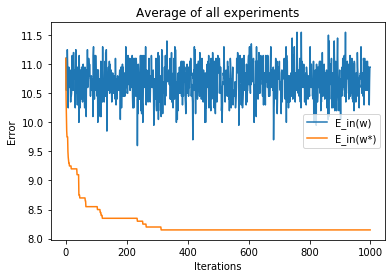

In [8]:
#Plotting E_in(w) and E_in(w*)
print("Plotting E_int(w) and E_int(w*)")
plt.plot(list(range(1000)), E_in_ave, label='E_in(w)')
plt.plot(list(range(1000)), E_in_pocket_ave, label='E_in(w*)')
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('Average of all experiments')
plt.legend()

Plotting E_out(w) and E_out(w*)


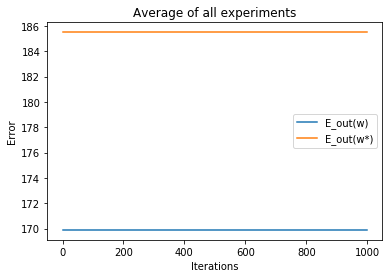

In [9]:
#Plotting E_out(w) and E_out(w*)
print("Plotting E_out(w) and E_out(w*)")
plt.plot(list(range(1000)), E_out_ave, label='E_out(w)')
plt.plot(list(range(1000)), E_out_pocket_ave, label='E_out(w*)')
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('Average of all experiments')
plt.legend()